Notebook 1, Module 2, Statistical Inference for Data Science, CAS Applied Data Science, 2023-08-29, A. Mühlemann, University of Bern.

*This notebook is based on the notebook by S. Haug and G. Conti from 2020*


# 1. Descriptive Statistics on Single Features



**Goals**
- Graphical preparation of the data
- Calculate summary statistics


First load the necessary libraries / modules.

In [1]:
# Load the needed python libraries by executing this python code (press ctrl enter)
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd
import io

Load the dataset into a dataframe.

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url,names=['slength','swidth','plength','pwidth','species'])
df.head() # Print the first five rows

,slength,swidth,plength,pwidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Browse through all rows.

In [3]:
pd.set_option('display.max_rows', 200)
df

,slength,swidth,plength,pwidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## 1.1 Graphical Analyis
### 1.1.1 Pie chart and bar plot (categorical variables)
Pie charts are used to show proportions of a whole.

We could, for example, ask ourselves, whether an equal number of specimens from each species have been examined.


<Axes: >

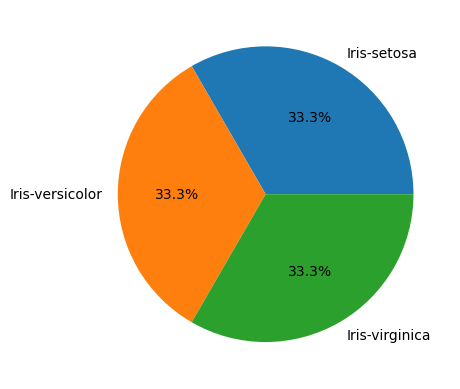

In [6]:
df.groupby('species').size().plot(kind='pie', autopct='%1.1f%%' ,ylabel="")

The problem with pie charts is that if there are many groups we tend missinterpret the pie slices (https://www.data-to-viz.com/caveat/pie.html). Thus, it often is reasonable sense to use a barplot instead.

<Axes: >

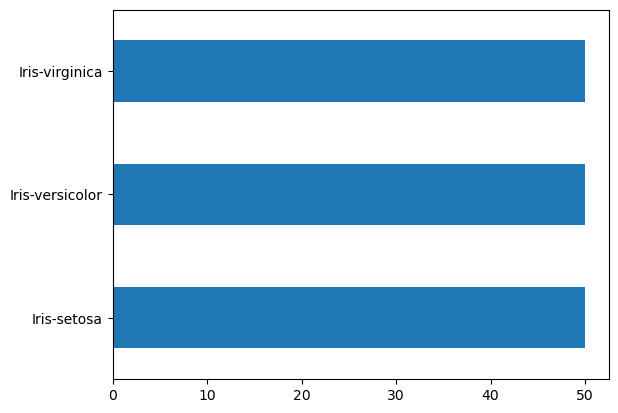

In [7]:
df.groupby('species').size().plot(kind='barh' ,ylabel="")

## 1.1.2 Histogram (numerical variables)
Histograms are used to display frequencies or proportions.

For example, we could use an histogram to analyze different characteristics whitin the species *iris setosa*.

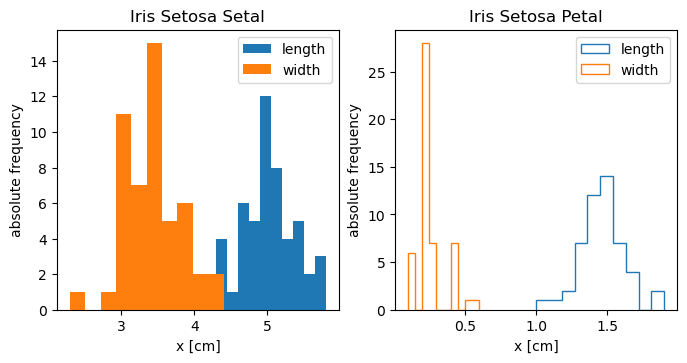

In [9]:
df_setosa = df[df['species']=='Iris-setosa']

plt.figure(figsize=(8  ,8))
plt.subplot(2,2,1)
df_setosa['slength'].plot(kind="hist",fill=True,histtype='barstacked',title='Iris Setosa Setal', label="length", color= 'tab:blue')
ax_s = df_setosa['swidth'].plot(kind="hist",fill=True,histtype='barstacked', label="width",  color= 'tab:orange')
ax_s.set_xlabel('x [cm]')
ax_s.set_ylabel('absolute frequency')
plt.legend()

plt.subplot(2,2,2)
df_setosa['plength'].plot(kind="hist",fill=False,histtype='step',title='Iris Setosa Petal', label="length")
ax_s = df_setosa['pwidth'].plot(kind="hist",fill=False,histtype='step', label="width")
ax_s.set_xlabel('x [cm]')
ax_s.set_ylabel('absolute frequency')
plt.legend()

plt.show()

### 1.1.3 Scatter plot colored by species (simulatneous description)

Scatter plots use dots to represent values for two different numeric variables.

For example, we could look at the species and one of the numerical characteristics simulatneously.

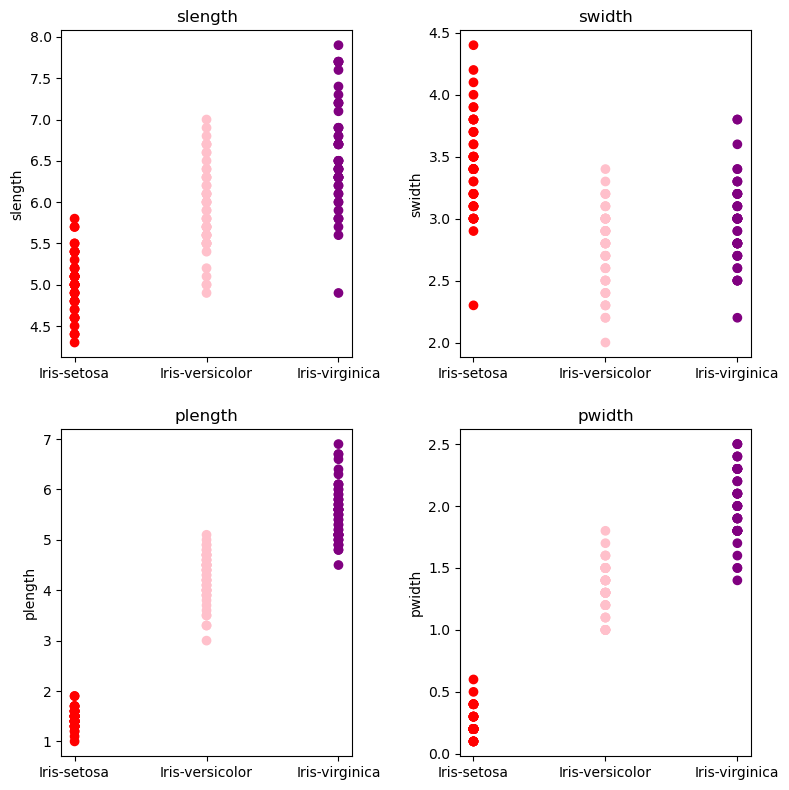

In [12]:
color=np.repeat(np.array(['red', 'pink', 'purple']), [50, 50, 50], axis=0)
df1=pd.DataFrame(dict(col=color))
df2=pd.concat([df, df1], axis=1)

plt.figure(figsize=(8  ,8))

plt.subplot(2,2,1)
plt.scatter(df2['species'], df2['slength'], c=df2['col'])
plt.title('slength')
plt.ylabel('slength')

plt.subplot(2,2,3)
plt.scatter(df2['species'], df2['plength'], c=df2['col'])
plt.title('plength')
plt.ylabel('plength')

plt.subplot(2,2,2)
plt.scatter(df2['species'], df2['swidth'], c=df2['col'])
plt.title('swidth')
plt.ylabel('swidth')

plt.subplot(2,2,4)
plt.scatter(df2['species'], df2['pwidth'], c=df2['col'])
plt.title('pwidth')
plt.ylabel('pwidth')

plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

What can you see in this picture?

# 1.2 Numerical analysis

# 1.2.1 Location

Location measures are used to describe typical values of a variable. Best known are the mean and the median.


In [13]:
grouped_df = df.groupby("species") # group by species, so we get means for all species seperately
grouped_df.mean()

,slength,swidth,plength,pwidth
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [14]:
grouped_df.median()

,slength,swidth,plength,pwidth
species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


Do the means and medians support your observations from the pictures?

## 1.2.2 Spread

Typical values are interesting but sometimes more information is needed. It is for example also of interest to see how spead the values are. Typical measures for the spread are the variance, standard deviation, inter quartile range, etc.


In [16]:
grouped_df.std()

,slength,swidth,plength,pwidth
species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


Which characteristic has the largest standard deviation? What is the definition of the standard deviation?

We can also look at the IQR.

In [20]:
#define function to calculate interquartile range
def find_iqr(x):
  return np.subtract(*np.percentile(x, [75, 25]))
# calculate IDR for plength for each species
b = grouped_df['plength'].apply(find_iqr)
a = grouped_df['plength'].quantile(0.75)-grouped_df['plength'].quantile(0.25)
print(b)
print(a)

species
Iris-setosa        0.175
Iris-versicolor    0.600
Iris-virginica     0.775
Name: plength, dtype: float64
species
Iris-setosa        0.175
Iris-versicolor    0.600
Iris-virginica     0.775
Name: plength, dtype: float64


Compare the standard deviation of plength with its IQR.
(Information on the *-operator: https://treyhunner.com/2018/10/asterisks-in-python-what-they-are-and-how-to-use-them/)



Alternatively, one can also get most of those measures with a single command:

In [21]:
grouped_df.describe()

slength                                             swidth  \
                  count   mean       std  min    25%  50%  75%  max  count   
species                                                                      
Iris-setosa        50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   50.0   
Iris-versicolor    50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   50.0   
Iris-virginica     50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   50.0   

                        ... plength      pwidth                             \
                  mean  ...     75%  max  count   mean       std  min  25%   
species                 ...                                                  
Iris-setosa      3.418  ...   1.575  1.9   50.0  0.244  0.107210  0.1  0.2   
Iris-versicolor  2.770  ...   4.600  5.1   50.0  1.326  0.197753  1.0  1.2   
Iris-virginica   2.974  ...   5.875  6.9   50.0  2.026  0.274650  1.4  1.8   

                                
                 50%  75%  max  
species                         
Iris-setosa      0.2  0.3  0.6  
Iris-versicolor  1.3  1.5  1.8  
Iris-virginica   2.0  2.3  2.5  

[3 rows x 32 columns]

However, this output is not very comprehensible. Here it makes more sense to consider only one species for the summary:

In [23]:
df[df['species']=='Iris-setosa'].describe()

,slength,swidth,plength,pwidth
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


Do all these digits after the comma make sense?

## 1.2.3 Shape

Another measure that is often looked at is the shape of the distribution. The mostly used measures are the skewness and the kurtosis.

In [24]:
grouped_df.skew()

,slength,swidth,plength,pwidth
species,,,,
Iris-setosa,0.120087,0.107053,0.071846,1.197243
Iris-versicolor,0.105378,-0.362845,-0.606508,-0.031180
Iris-virginica,0.118015,0.365949,0.549445,-0.129477


The skewness of *iris setosa* is $>0$ for all characteristics. What does that mean?

Now let us look at the kurtosis.

In [25]:
grouped_df.apply(pd.DataFrame.kurt, numeric_only=True)

,slength,swidth,plength,pwidth
species,,,,
Iris-setosa,-0.252689,0.889251,1.031626,1.566442
Iris-versicolor,-0.533010,-0.366237,0.047903,-0.410059
Iris-virginica,0.032904,0.706071,-0.153779,-0.602264


The idea behind the kurtosis is the following:
Some numerical characteristics, when the sample size is large and the intervals are small, result in a histogram that resembles a Gaussian bell curve. In this case, the value of the kurtosis is close to zero. If the tails are heavier than you would expect for a Gaussian distribution the kurtosis will be substantially positive. If the tails are less heavy than you would expect for a Gaussian distribution the kurtosis will be negative.


## 1.7 Outlook
The characteristic *slength* from of the species *iris virginica* has a kurtosis close to zero. Moreover, its skewness is close to 0. Therefore, a Gaussian model would probably be suitable. To get an idea whether this is plausible let us  compare the histogram to the Gaussian density function.

When looking at hypothesis testing, we will see how to test this mathematically.

Our model is a normal distribution with the mean and width taken from the dataset: **norm.pdf(x,mean,width)**.

6.587999999999998 0.635879593274432


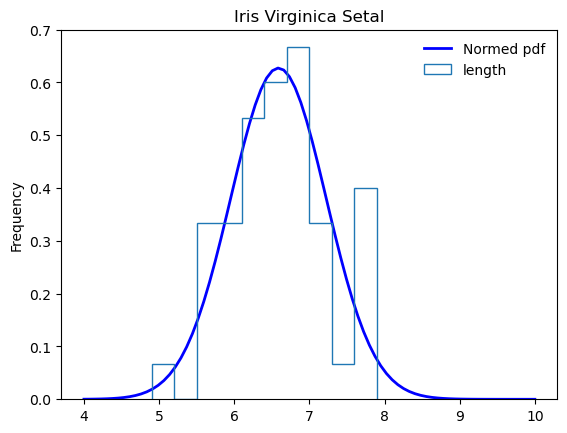

In [26]:
df_virginica=df[df['species']=='Iris-virginica']
from scipy.stats import norm
mean  = df_virginica['slength'].mean()
width = df_virginica['slength'].std()
print(mean,width)
# Create figure and axis
fig, ax = plt.subplots(1,1)
# Create 100 x values and plot the normal pdf for these values
#x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
x = np.linspace(4,10,80)
ax.plot(x, norm.pdf(x,mean,width),'b-', lw=2, label='Normed pdf')
df_virginica['slength'].plot(kind="hist",fill=False,histtype='step',title='Iris Virginica Setal', label="length", density="True")
ax.legend(loc='best', frameon=False)
plt.show()

With this model we could now do a lot of inference. Taking a random leave, one could for example test how likely it is to be Iris Viginica.


# 2. Simultaneous Description of two Features

In the first part of this notebook, we only looked at individual characteristics. For example, we calculated the mean *slength* of *iris setosa*. Of course, we did this simultaneously for all characteristics and species, but we never compared two characteristics directly. That is what we would like to do now.

## 2.1 Graphical Analysis

### 2.1.1 Boxplots

A boxplot is a graphical display of the minimum, maximum, and the 3 quartiles.
For example, could we display distributions of *slength* for the 3 species.


Text(0.5, 1.0, 'slength')

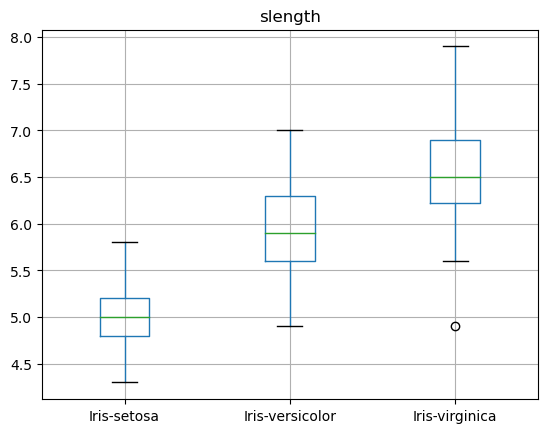

In [27]:
df_slength=df[['slength', 'species']]
fig, ax = plt.subplots(1,1)
df_slength.pivot(columns='species', values='slength').boxplot()
ax.set_title('slength')


### 2.1.2 Scatter matrix

Now let us see whether some of the features correlate. To this end, we look at the scatter plots of the different characterisics for *iris setosa*.

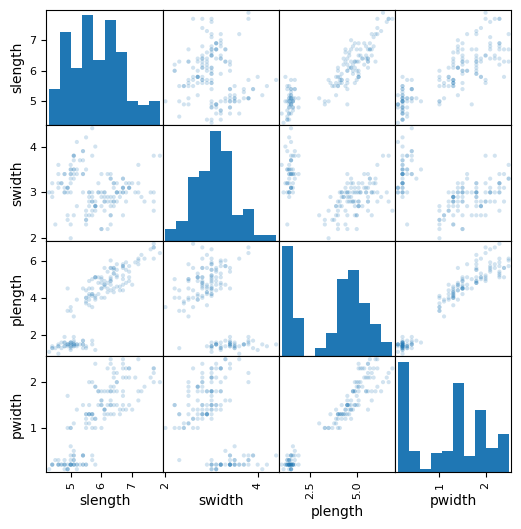

In [31]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.plotting.scatter_matrix.html
from pandas.plotting import scatter_matrix
#scatter_matrix(df[df['species']=='Iris-setosa'], alpha=0.2, figsize=(6, 6), diagonal='hist')
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='hist')
plt.show()

The scatter plot in the first row and second colum suggests that there is some relationship between *slength* and *swidth*. It seems that the larger *swidth* is the larger is also *slength*.

## 2.2 Numerical Analyis

### 2.3 Correlation
To get more information on the correlation between two variables the correlation coefficient is calculated.

Let's see whether the correlation coefficient does support this observation.

**Caution**: correlation not equals causation!!


In [29]:
df[df['species']=='Iris-setosa'].corr()

C:\Users\User\AppData\Local\Temp\ipykernel_15716\514599823.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df['species']=='Iris-setosa'].corr()


,slength,swidth,plength,pwidth
slength,1.000000,0.746780,0.263874,0.279092
swidth,0.746780,1.000000,0.176695,0.279973
plength,0.263874,0.176695,1.000000,0.306308
pwidth,0.279092,0.279973,0.306308,1.000000


What is the definition of the correlation?


What kind of relationship between *swidth* and *slength* does the correlation coefficient suggest?

How about the other species?

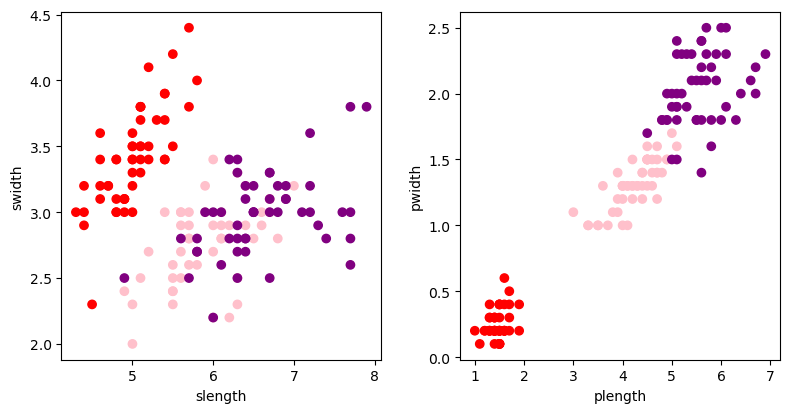

In [30]:
color=np.repeat(np.array(['red', 'pink', 'purple']), [50, 50, 50], axis=0)
df1=pd.DataFrame(dict(col=color))
df2=pd.concat([df, df1], axis=1)

plt.figure(figsize=(8  ,8))

plt.subplot(2,2,1)
plt.scatter(df2['slength'], df2['swidth'], c=df2['col'])
plt.xlabel('slength')
plt.ylabel('swidth')

plt.subplot(2,2,2)
plt.scatter(df2['plength'], df2['pwidth'], c=df2['col'])
plt.xlabel('plength')
plt.ylabel('pwidth')

plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

## Remark

This was only a short overview on what can be done and on how these approaches can be implemented using python. Of course there are many more options that could be explored.

